In [1]:
123*4

492


# Summary: usecase sales dashboard with Jupyter Dash


<p>
<b>Notice:</b><br>
A live version is deposited on Binder.<br>
"Binder allows you to create custom computing environments that can be shared and used by many remote users."<br>
This allows to see the Dash apps create in the notebooks locally in your browser.<br>
Jumpt directly to Binder for running the code of the repository:
<a href="https://mybinder.org/v2/gh/RolfChung/usecase_sales_dashboard_plotly_dash/HEAD" target="_blank">usecase_sales_dashboard</a> 
</p>

<p>
Dash made a great job bringing Dash to Jupyter.<br>
Normally you would develop and start Dash from an IDE and the command line.<br>
As this project is a demonstration of Dash capabilities JupyterDash was chosen.<br>
The JupyterDash has different modes of presentation: inline, jupyter lab, external.<br>
The repository here uses inline and external.<br>
In external mode a link is created at the end of the notebook. This outputsthe Dash app into a website.<br>
However Github does not allow to start Dash apps from notebooks right now.<br>
That is a reason a Binder version of this repository was created.<br>
One last word: <b>Dash needs Javascript to be installed on the machine to work.</b>
</p>


<p>
This is a use case for Plotly Dash.<br>
It creates a sales dashboard for world wide e-commerce data.<br>
According to Wordnik a dashboard is <br>
"a user interface on a computer display that presents constantly updated information, such as processing speed, in a format that resembles the dashboard of a vehicle."<br>
This sales dashboard is intuitively understandable.    
<p>

<p>
On a technical level this project applies Plotly and JupyterDash for data visualization and web deployment.<br>
It is also applying HTML and CSS to structure and style the dashboard.
</p>

<p>
This notebook is part of larger project consisting of a portfolio of notebooks testing out different versions of the sales dashboard.<br>
This notebook creates Plotly graphics.<br>
Plotly graphics are often used as inputs into Dash apps.</p>
There is also a dedicated notebook for importing and cleaning the data.<br>
The cleaned data can immediately used in the JupyterDash notebooks.<br>
It is followed up by another project adding interactivity to the sales dashboard.<br>
Then users can get particular information by sliding or klicking on graphic elements.<br>
</p>



<hr width=”300″, size=5> 

# Importing packages

In [2]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os

### Plotly

In [3]:
import ipywidgets

In [4]:

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly.offline.init_notebook_mode(connected=True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
import plotly.offline as pyo
#pyo.init_notebook_mode()

#import plotly.io as pio
print(pio.renderers)

pio.renderers.default = 'jupyterlab'


plotly.offline.init_notebook_mode(connected=True)

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



#### Node.js
<p>
Do not forget to install node.js on your machine and in the env.<br>
Otherwise inline plotly plots will not render.<br>
https://jupyterlab.readthedocs.io/en/stable/user/extensions.html#using-the-extension-manager
</p>

### Testing Plotly within JupyterLab
<p>Plotly works!</p>


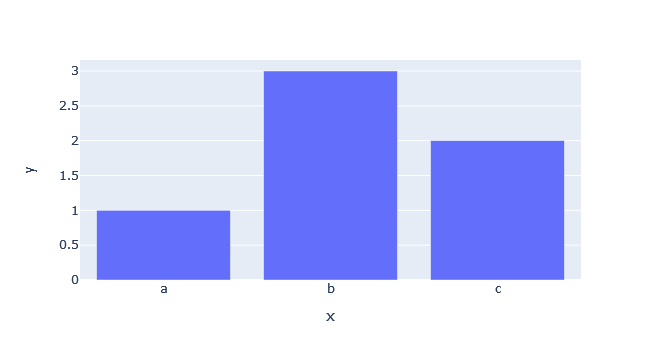

In [5]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

#### Checking current working directory

In [6]:
# %%cmd
# cd

cwd=os.getcwd()
# print(cwd)

In [7]:
#### Checking versions

!python --version
!conda --version

print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Seaborn {}".format(sns.__version__))
print("Plotly {}".format(plotly.__version__))

Python 3.10.0
conda 4.12.0
Pandas: 1.4.1
Numpy: 1.21.5
Seaborn 0.11.2
Plotly 5.6.0


### Creating an requirements file

In [8]:
%%capture
%%cmd 
mkdir txt

In [9]:
!conda list > txt/requirements_dash_dashboards_plotly.txt
!jupyter --version > txt/jupyter_version.txt

# Importing the data

In [10]:
ecom_full_imp = \
pd.read_csv("csv/cleaned_df/ecom_full_cleaned.csv")

# ecom_full_imp.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [11]:
ecom_full_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  int64  
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
 8   year         541909 non-null  int64  
 9   month        541909 non-null  int64  
 10  year_month   541909 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 45.5+ MB


In [12]:
ecom_full_imp.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,2010-12-01


### Plotting with plotly
#### Total Quantity by Country

In [13]:
quantity_sum_by_country_df = \
ecom_full_imp.groupby('Country')['Quantity'].agg('sum').sort_values(ascending=False).\
reset_index(name="quantity_sum_by_country")

top_ten_quantity_sum_by_country_df = \
quantity_sum_by_country_df.iloc[:10, :]

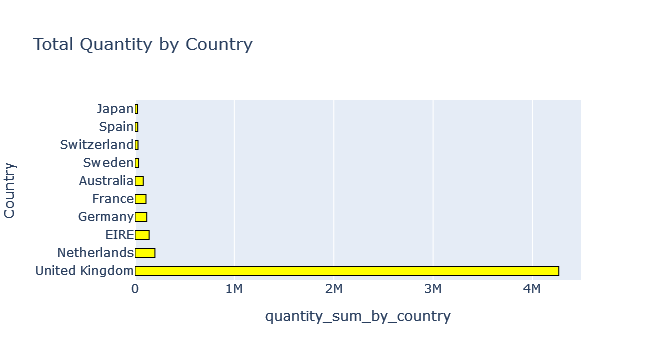

In [14]:
# Create the bar graph object
bar_fig = px.bar(
  # Set the DataFrame, x and y
  data_frame=top_ten_quantity_sum_by_country_df, x='quantity_sum_by_country', y='Country',
  # Set the graph to be horizontal
  orientation='h', title='Total Quantity by Country')

# Increase the gap between bars
bar_fig.update_layout({'bargap': 0.5})

bar_fig.update_traces(marker_line_width=1, marker_line_color="black", marker_color='yellow')

bar_fig.show()

In [15]:
top_ten_quantity_sum_by_country_df.to_csv("csv/cleaned_df/top_ten_quantity_sum_by_country_df.csv",
                                         index=False)

### Revenue

In [16]:
ecom_not_uk = \
ecom_full_imp[ecom_full_imp.Country != 'United Kingdom']

In [17]:
revenue = \
ecom_not_uk.groupby(['year_month', 'Country'])['UnitPrice'].agg(sum).reset_index(name='revenue')

revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_month  301 non-null    object 
 1   Country     301 non-null    object 
 2   revenue     301 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [18]:
top_ten_countries_nonUK = \
revenue.sort_values(by='revenue', ascending=False).loc[:12, 'Country'].drop_duplicates()[:10]


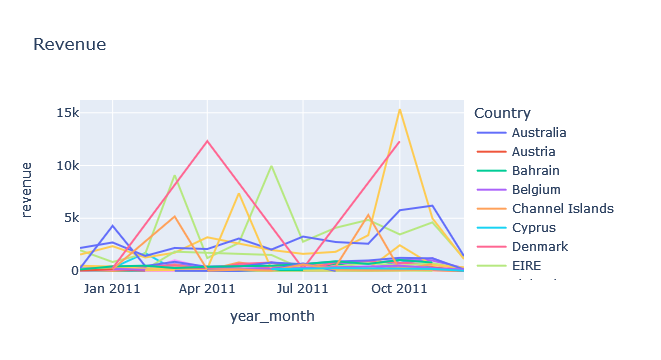

In [19]:
revenue_graph = \
px.line(data_frame=revenue, x='year_month', y='revenue', color='Country', 
        title="Revenue")

revenue_graph.show()

In [20]:
revenue.to_csv("csv/cleaned_df/revenue.csv", index=False)

#### Revenue of top ten countries

<p>
needs filtering given a multi index.
</p>

In [21]:
top_ten_countries_nonUK = \
revenue.sort_values(by='revenue', ascending=False).loc[:12, 'Country'].drop_duplicates()[:10].tolist()

top_ten_countries_nonUK

['France',
 'Singapore',
 'EIRE',
 'Portugal',
 'Germany',
 'Hong Kong',
 'Spain',
 'Norway',
 'Cyprus',
 'Italy']

In [22]:
top_ten_df = \
revenue[revenue.Country.isin(top_ten_countries_nonUK)]

top_ten_df.head(2)


,year_month,Country,revenue
5,2010-12-01,Cyprus,198.68
7,2010-12-01,EIRE,1973.13


In [23]:
top_ten_df_unique = top_ten_df.Country.sort_values().unique().tolist()
top_ten_countries_nonUK.sort()


countries_same = \
pd.DataFrame(zip(top_ten_df_unique, top_ten_countries_nonUK), 
             columns=['top_ten_df_unique', 'top_ten_countries_nonUK'])

def match(row):
    if row[0] == row[1]:
        value = 1
    else:
        value = 0
    
    return value
        
countries_same['match'] = countries_same.apply(match, axis=1)

countries_same

,top_ten_df_unique,top_ten_countries_nonUK,match
0,Cyprus,Cyprus,1
1,EIRE,EIRE,1
2,France,France,1
3,Germany,Germany,1
4,Hong Kong,Hong Kong,1
5,Italy,Italy,1
6,Norway,Norway,1
7,Portugal,Portugal,1
8,Singapore,Singapore,1
9,Spain,Spain,1


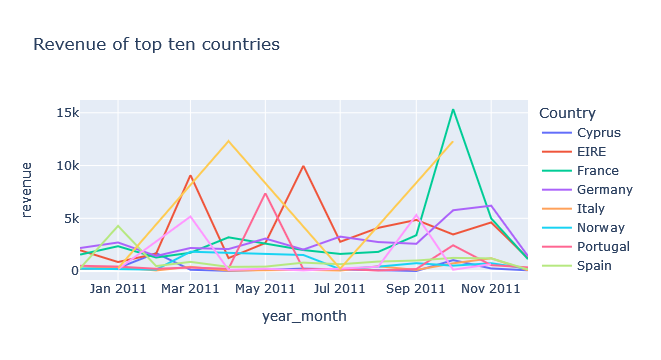

In [24]:
revenue_graph_topten = \
px.line(data_frame=top_ten_df, x='year_month', y='revenue', color='Country', 
        title="Revenue of top ten countries")

revenue_graph_topten.show()

In [25]:
top_ten_df.to_csv("csv/cleaned_df/revenue_topten.csv", index=False)